# Практическое задание №2 по теме "Keras".

<ol>
    <li>Попробуйте обучить, нейронную сеть на Keras (рассмотренную на уроке) на датасете MNIST с другими параметрами. 
        Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?</li>
    <li>Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.</li>
</ol>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import load_model
from keras.optimizers import Adam

Using TensorFlow backend.


## Загрузка данных

In [2]:
(train_imagesi, train_labels),(test_imagesi, test_labels) = fashion_mnist.load_data()

train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape)
print(test_images.shape)
print(np.unique(train_labels))

(60000, 784)
(10000, 784)
[0 1 2 3 4 5 6 7 8 9]


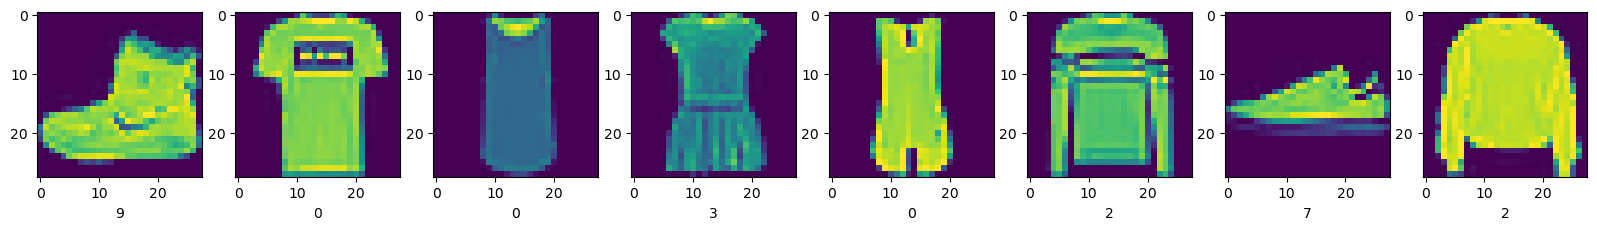

In [3]:
N = 8
plt.figure(figsize=(20, 10))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(train_imagesi[i,:,:])
    plt.xlabel(str(train_labels[i]))
plt.show()

## Обучение моделей

### Эксперимент №1

Проверим как количество слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров) влияет на качество модели.

In [4]:
model_1 = Sequential([
  Dense(128, activation='tanh', input_shape=(784,)),
  Dense(100, activation='tanh'),
  Dense(10, activation='softmax'),
], name='2L_114kP')

model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
model_2 = Sequential([
  Dense(128, activation='tanh', input_shape=(784,)),
  Dense(72, activation='tanh'),
  Dense(56, activation='tanh'),
  Dense(10, activation='softmax'),
], name='3L_114kP')

model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
model_3 = Sequential([
  Dense(120, activation='tanh', input_shape=(784,)),
  Dense(96, activation='tanh'),
  Dense(64, activation='tanh'),
  Dense(28, activation='tanh'),
  Dense(16, activation='tanh'),  
  Dense(10, activation='softmax'),
], name='5L_114kP')

model_3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
model_4 = Sequential([
  Dense(100, activation='tanh', input_shape=(784,)),
  Dense(93, activation='tanh'),
  Dense(84, activation='tanh'),
  Dense(72, activation='tanh'),
  Dense(64, activation='tanh'),
  Dense(48, activation='tanh'),  
  Dense(40, activation='tanh'),
  Dense(32, activation='tanh'),
  Dense(24, activation='tanh'),
  Dense(16, activation='tanh'),  
  Dense(10, activation='softmax'),
], name='10L_114kP')

model_4.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# Обучение
hh_1 = model_1.fit(train_images, to_categorical(train_labels), epochs=15, batch_size=512, validation_split=0.2, verbose=0)
hh_2 = model_2.fit(train_images, to_categorical(train_labels), epochs=15, batch_size=512, validation_split=0.2, verbose=0)
hh_3 = model_3.fit(train_images, to_categorical(train_labels), epochs=15, batch_size=512, validation_split=0.2, verbose=0)
hh_4 = model_4.fit(train_images, to_categorical(train_labels), epochs=15, batch_size=512, validation_split=0.2, verbose=0)

# Оценка
ev_1 = model_1.evaluate(test_images, to_categorical(test_labels))
ev_2 = model_2.evaluate(test_images, to_categorical(test_labels))
ev_3 = model_3.evaluate(test_images, to_categorical(test_labels))
ev_4 = model_4.evaluate(test_images, to_categorical(test_labels))


10000/10000 [==============================] - 0s 16us/step


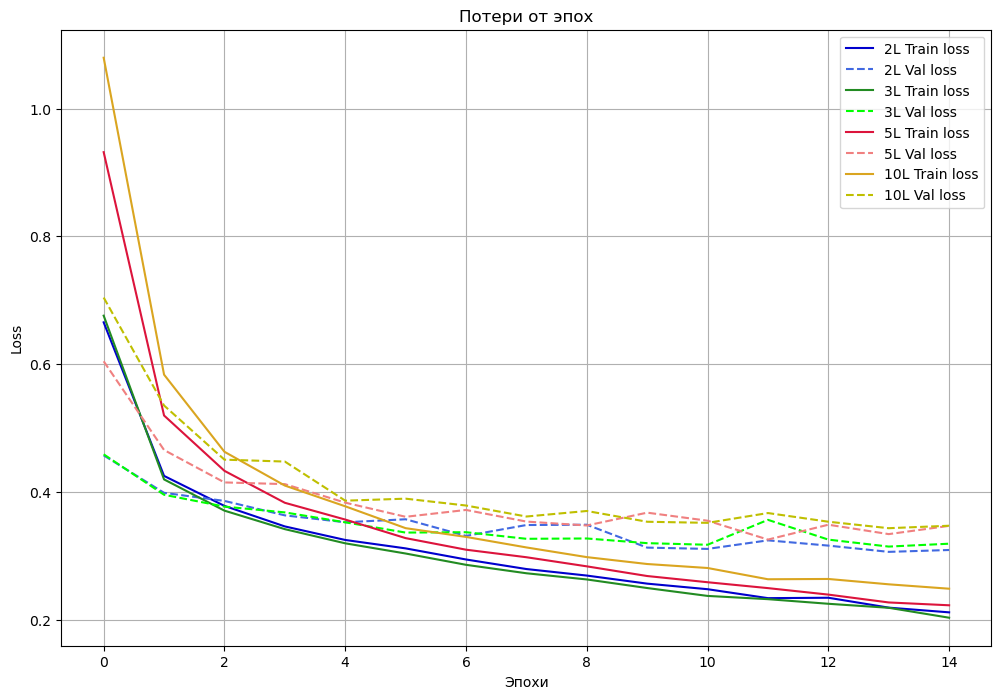

In [9]:
plt.figure(figsize=(12,8))
plt.plot(hh_1.history['loss'], '-' , color = 'mediumblue', label='2L Train loss')
plt.plot(hh_1.history['val_loss'], '--', color='royalblue', label='2L Val loss')
plt.plot(hh_2.history['loss'], '-' , color = 'forestgreen', label='3L Train loss')
plt.plot(hh_2.history['val_loss'], '--', color='lime', label='3L Val loss')
plt.plot(hh_3.history['loss'], '-' , color = 'crimson', label='5L Train loss')
plt.plot(hh_3.history['val_loss'], '--', color='lightcoral', label='5L Val loss')
plt.plot(hh_4.history['loss'], '-' , color = 'goldenrod', label='10L Train loss')
plt.plot(hh_4.history['val_loss'], '--', color='y', label='10L Val loss')
plt.xlabel("Эпохи")
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.title("Потери от эпох")
plt.show()

In [10]:
print(f"{model_1.name}: {dict(zip(model_1.metrics_names, ev_1))}")
print(f"{model_2.name}: {dict(zip(model_2.metrics_names, ev_2))}")
print(f"{model_3.name}: {dict(zip(model_3.metrics_names, ev_3))}")
print(f"{model_4.name}: {dict(zip(model_4.metrics_names, ev_4))}")

2L_114kP: {'loss': 0.3432043536901474, 'accuracy': 0.8795999884605408}
3L_114kP: {'loss': 0.35332812155485155, 'accuracy': 0.8783000111579895}
5L_114kP: {'loss': 0.3778331157207489, 'accuracy': 0.8730999827384949}
10L_114kP: {'loss': 0.37426213218569754, 'accuracy': 0.8751000165939331}


Как видим увеличение количества слоев при близких размерах сети особо сильно не повлияло на качество модели. Точность примерно одинаковая. 

Также переобучение возникает примерно с одной и той же эпохи. Переобучение можно определить по эпохе, с которой начинается расти разница между valid loss и train loss.

### Эксперимент №2

Проверим работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей.

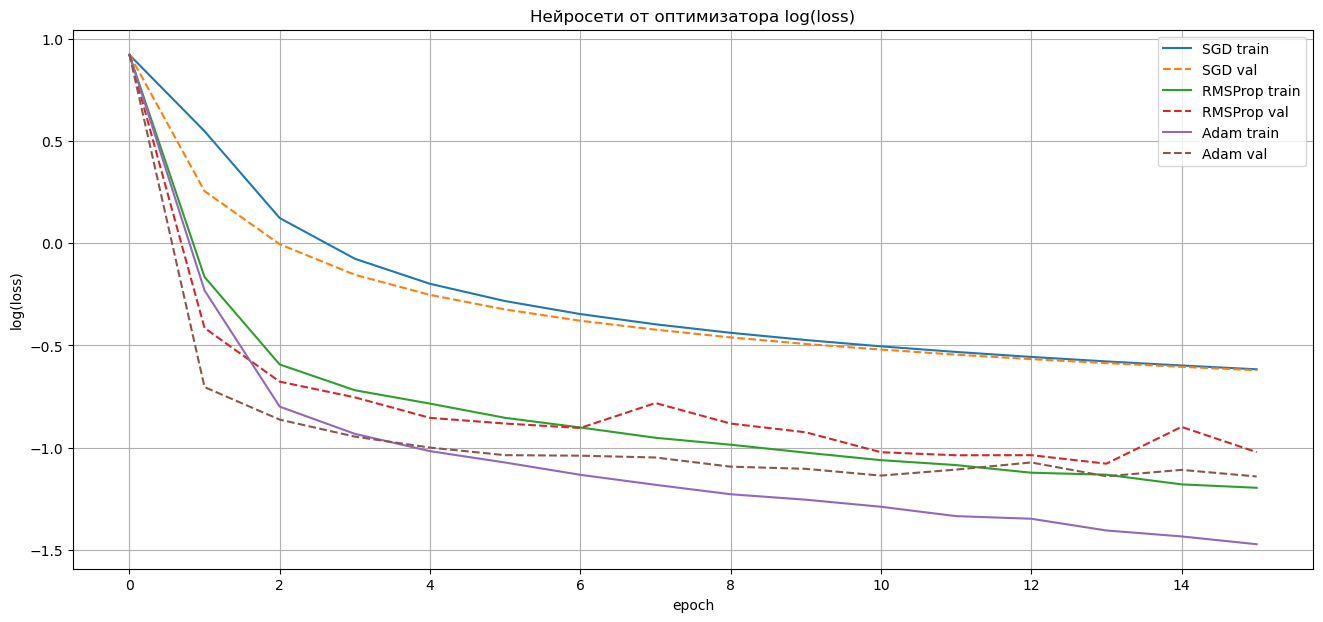

In [11]:
model = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),
    Dense(110, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(10, activation='softmax'),
])

model.save_weights('model.h5')
plt.figure(figsize=(16,7))
epochs= 15
epoch = np.arange(epochs+1)

for i_optim in ['SGD', 'RMSProp', 'Adam']:
    modeli = Sequential([
        Dense(128, activation='tanh', input_shape=(784,)),
        Dense(110, activation='tanh'),
        Dense(100, activation='tanh'),
        Dense(10, activation='softmax'),
    ])
    
    modeli.load_weights("model.h5")
    
    modeli.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    
    hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]), verbose=0)
    hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]), verbose=0)
    hh = modeli.fit(train_images, to_categorical(train_labels), epochs=epochs, batch_size=1024, validation_split=0.2, verbose=0)
    plt.plot(epoch, np.log([hh0_tr[0]] + hh.history['loss']), '-', label = i_optim + ' train')
    plt.plot(epoch, np.log([hh0_val[0]] + hh.history['val_loss']), '--', label = i_optim + ' val')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.title('Нейросети от оптимизатора log(loss)')
plt.show()

По графику видно, что лучший оптимайзер - Adam.

Кроме того, с помощью Keras можно устанавливать конкретные гиперпараметры оптимизатора:

In [12]:
model_x = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),
    Dense(110, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(10, activation='softmax'),
])

model_x.compile(
    optimizer= Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model_y = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),
    Dense(110, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(10, activation='softmax'),
])

model_y.compile(
    optimizer= Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
# Обучение
hh_x = model_x.fit(train_images, to_categorical(train_labels), epochs=15, batch_size=512, validation_split=0.2, verbose=0)
hh_y = model_y.fit(train_images, to_categorical(train_labels), epochs=15, batch_size=512, validation_split=0.2, verbose=0)


# Оценка
ev_x = model_x.evaluate(test_images, to_categorical(test_labels))
ev_y = model_y.evaluate(test_images, to_categorical(test_labels))

10000/10000 [==============================] - 0s 16us/step


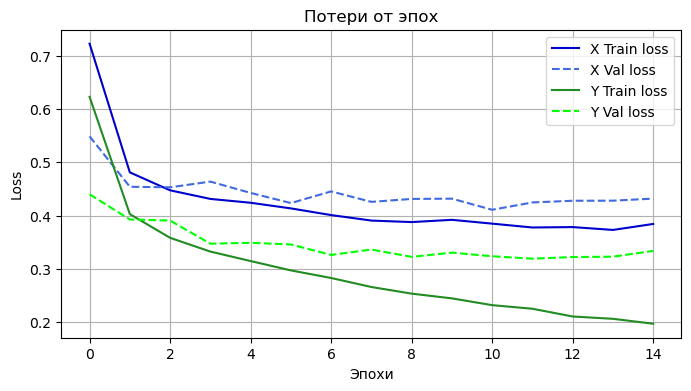

In [15]:
plt.figure(figsize=(8,4))
plt.plot(hh_x.history['loss'], '-' , color = 'mediumblue', label='X Train loss')
plt.plot(hh_x.history['val_loss'], '--', color='royalblue', label='X Val loss')
plt.plot(hh_y.history['loss'], '-' , color = 'forestgreen', label='Y Train loss')
plt.plot(hh_y.history['val_loss'], '--', color='lime', label='Y Val loss')
plt.xlabel("Эпохи")
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.title("Потери от эпох")
plt.show()

По графику видно, что меняя гиперпараметры можно также отыскать более точную модель.

### Эксперимент №3

Проверим как количество эпох влияет на качество модели.

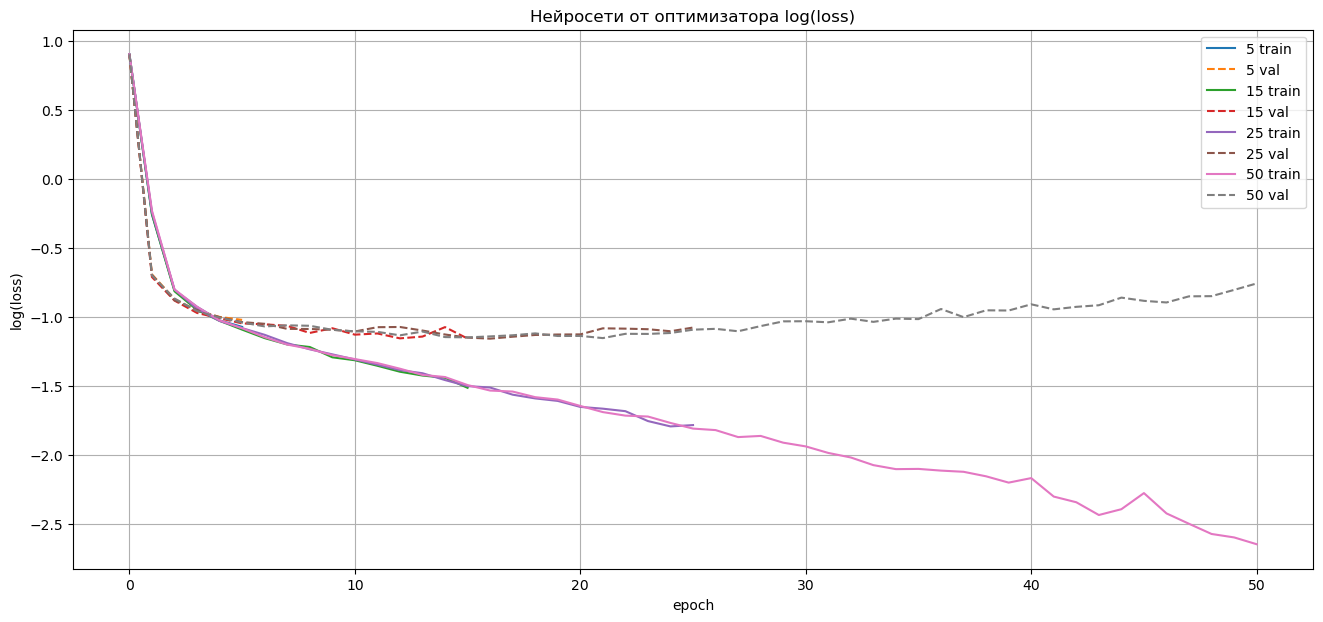

In [16]:
model = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),
    Dense(110, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(10, activation='softmax'),
])

model.save_weights('model.h5')
plt.figure(figsize=(16,7))
epochs_list = [5, 15, 25, 50]
# epoch = np.arange(epochs+1).

for epochs in epochs_list:
    modeli = Sequential([
        Dense(128, activation='tanh', input_shape=(784,)),
        Dense(110, activation='tanh'),
        Dense(100, activation='tanh'),
        Dense(10, activation='softmax'),
    ])
    modeli.load_weights("model.h5")
    modeli.compile(
        optimizer='Adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    
    hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]), verbose=0)
    hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]), verbose=0)
    
    hh = modeli.fit(train_images, to_categorical(train_labels), epochs=epochs, batch_size=1024, validation_split=0.2, verbose=0)
    epoch = np.arange(epochs+1)
    plt.plot(epoch, np.log([hh0_tr[0]] + hh.history['loss']), '-', label = f'{epochs} train')
    plt.plot(epoch, np.log([hh0_val[0]] + hh.history['val_loss']), '--', label = f'{epochs} val')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.title('Нейросети от оптимизатора log(loss)')
plt.show()

Как видим с ростом эпох появляется большая опасность переобучения. Когда valid loss начинают снова расти, train loss падать и получается сильная разница между valid и train точностью. 

В данном примере за 7-10 эпох модель быстро переобучилась.

### Эксперимент №4

Проверим как размер батча влияет на модель.

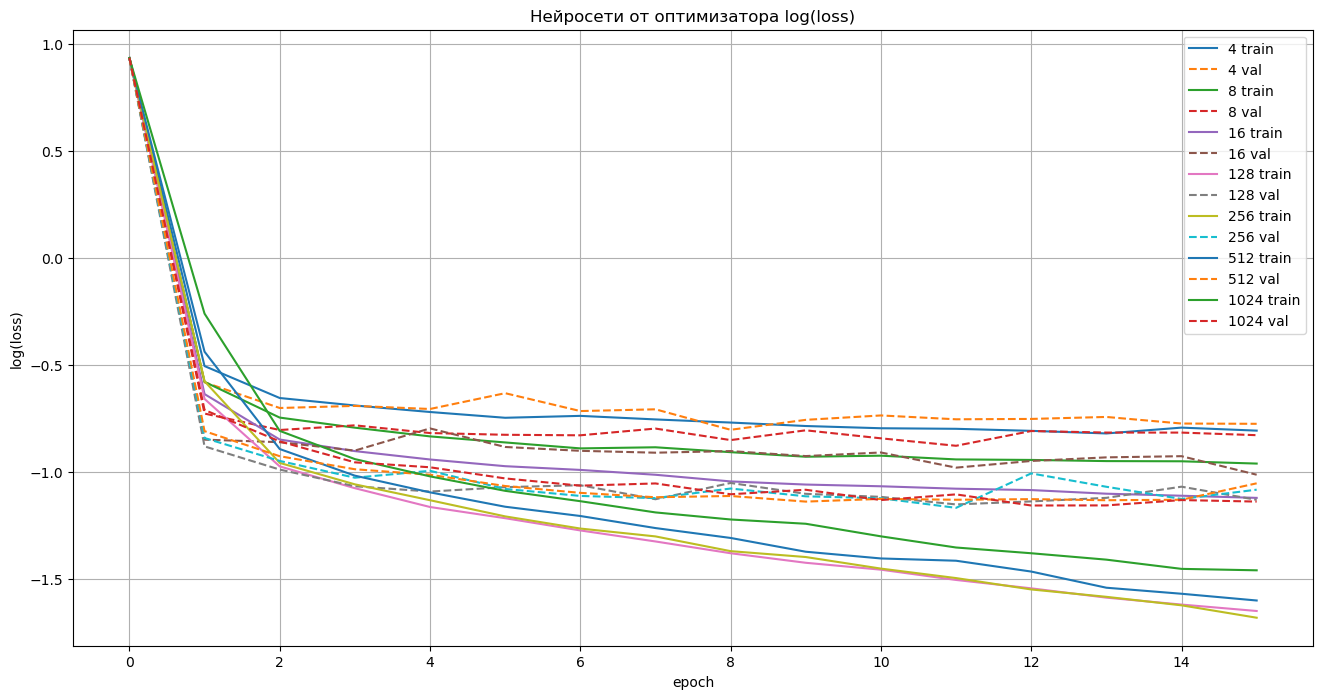

In [17]:
model = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),
    Dense(110, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(10, activation='softmax'),
])

model.save_weights('model.h5')
plt.figure(figsize=(16,8))
epochs= 15
epoch = np.arange(epochs+1)
batch_list = [4, 8, 16, 128, 256, 512, 1024]

for batch_size in batch_list:
    modeli = Sequential([
        Dense(128, activation='tanh', input_shape=(784,)),
        Dense(110, activation='tanh'),
        Dense(100, activation='tanh'),
        Dense(10, activation='softmax'),
    ])
    
    modeli.load_weights("model.h5")
    
    modeli.compile(
        optimizer='Adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    
    hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]), verbose=0)
    hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]), verbose=0)
    hh = modeli.fit(train_images, to_categorical(train_labels), epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    plt.plot(epoch, np.log([hh0_tr[0]] + hh.history['loss']), '-', label = f'{batch_size} train')
    plt.plot(epoch, np.log([hh0_val[0]] + hh.history['val_loss']), '--', label = f'{batch_size} val')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.title('Нейросети от оптимизатора log(loss)')
plt.show()

По графику видно, что размер батча влияет на качество модели. Если batch_size слишком мал, то модель будет иметь хуже качество после обучения.

### Вывод


* Увеличение количества слоев при близких размерах сети (близкое число тренируемых параметров) особо не влияет на качество модели (Эксперимент №1)

* От выбора оптимизатора сильно зависит точность модели (Эксперимент №2). Поэтому не нужно жалеть времени на поиск самого оптимального типа оптимизатора. Кроме того, Keras позволяет задавать различные гиперпараметры каждому оптимизатору (_keras.optimizers_), что тоже нужно использовать.
* __epochs__. Количество эпох должно быть оптимальным. Слишком мало - недообучение, слишком много - переобучение. Переобучение наступает тогда, когда точность на трейне растет, а точность на валидации перестает расти.
* __batch_size__. Нельзя делать размер батча слишком маленьким, модель будет неточной.
* Также хочется отметить, что в Keras есть команда `early_stopping`, которая позволяет прерывать обучение, если потери при проверке больше не уменьшаются уже какое-то количество эпох (параметр `patience`). Использование данной команды позволит сократить трату ресурсов на вычисление ненужных эпох.


---